In [4]:
import pandas as pd
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import sklearn

/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5, 0, 'first feature')

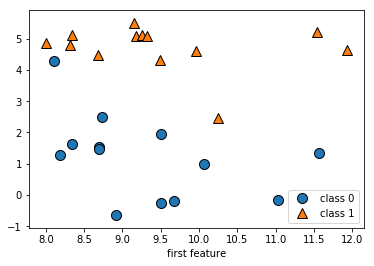

In [5]:
# make dataset
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0',"class 1"],loc = 4)
plt.xlabel("first feature")

In [8]:
print(X.shape)

(26, 2)


In [10]:
# 위스콘신 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() = \n{}".format(cancer.keys()))

cancer.keys() = 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
# data point 569, feature 30
print(cancer.data.shape)
print(cancer.feature_names)
print(len(cancer.feature_names))
print(len(cancer.data))

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
569


In [15]:
print("Number of data according to the class: {}".format({
    n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target))
}))

Number of data according to the class: {'malignant': 212, 'benign': 357}


In [17]:
# 보스턴 주택가격
from sklearn.datasets import load_boston
boston = load_boston()
print("data format : {}".format(boston.data.shape))

data format : (506, 13)


In [18]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape = {}".format(X.shape))

# 13개 기본 특성에 특성끼리 곱한 '상호작용'으로 의도적으로 확장한 데이터셋.
# 이런 식으로 특성을 유도하는 걸 feature engineering이라고 함.
# 13개 특성 + 13C2 78개 + 각 특성별 제곱값 13개 = 13 + 78 + 13 = 104

X.shape = (506, 104)


# KNN 적용하기

In [20]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge() # binary값으로 만든 가상의 데이터셋
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

/anaconda3/envs/python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
print("test set prediction: {}".format(clf.predict(X_test)))

test set prediction: [1 0 1 0 1 0 0]


In [24]:
print("test set accuracy: {}".format(clf.score(X_test, y_test)))

test set accuracy: 0.8571428571428571


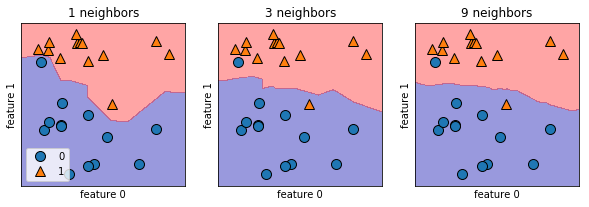

In [29]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax= ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

In [31]:
# cancer data KNN으로 처리해보기
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

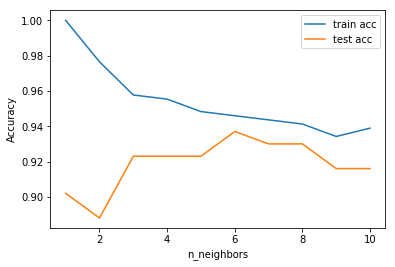

In [33]:
training_acc, test_acc = [], []
neighbors = range(1,11)
for n_neighbors in neighbors:
    # model creation
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # train_acc saving
    training_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(neighbors, training_acc, label = "train acc")
plt.plot(neighbors, test_acc, label = "test acc")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

KNN의 경우 neighbors 수가 늘어날수록 정규화. neighbors가 10 넘어가면 오히려 예측이 낮아진다.

# Linear Regression (OLS) 

In [34]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
print("coefficient = coef_ : {}".format(lr.coef_))
print("intercept = intercept_ : {}".format(lr.intercept_))

coefficient = coef_ : [0.39390555]
intercept = intercept_ : -0.031804343026759746


In [37]:
print("train acc : {}".format(lr.score(X_train, y_train)))
print("test acc : {}".format(lr.score(X_test, y_test)))
# train과 test 둘 다 값이 크지 않다 = underfitting.
# score값이 R**2라고 하는 거 같은데..?

train acc : 0.6700890315075756
test acc : 0.65933685968637


In [38]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("train acc : {}".format(lr.score(X_train, y_train)))
print("test acc : {}".format(lr.score(X_test, y_test)))
# overfitting. 과적합 방지를 위하

train acc : 0.952051960903273
test acc : 0.6074721959665863
